# Regressão Linear com Scikit-learn (sklearn)

In [0]:
import numpy as np

Variável X para armazenar a idade.

In [44]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
print(X)

[[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]


Vamos criar a variável Y que vai indicar o valor do plano de saúde.

In [45]:
Y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])
print(Y)

[[ 871]
 [1132]
 [1042]
 [1356]
 [1488]
 [1638]
 [1569]
 [1754]
 [1866]
 [1900]]


## Gráfico

Importar a bilioteca matplotlib:

In [0]:
import matplotlib.pyplot as plt
# como estamos trabalhando em um notebook, precisamo adicionar o código para fazer o inline
%matplotlib inline

Vamos agora visualizar um gráfico, para identificar a disposição dos dados.

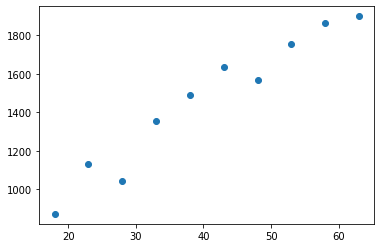

In [47]:
plt.scatter(X, Y)

Podemos ver que ficar fácil de visualizar uma tendência dos valores. Quanto maior a idade, maior o valor do plano de saúde.

## Modelo de Regressão Linear Simples

Y = $b_0$ + $b_1$ * $X_1$

Onde:


*   Y = previsão de custo;
*   $b_0$ = constante, valor inicial;
*   $b_1$ = coeficiente, declive da linha;
*   $X_1$ = idade.





Importação para o SKLearn

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Agora, para efetivamente fazer o treinamento:

In [49]:
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos agora visualizar os coeficientes b0 e b1:

Y = $b_0$ + $b_1$ * $X_1$

In [50]:
# b0 - valor inicial
regressor.intercept_

array([541.24363636])

In [51]:
# b1 - declive da linha
regressor.coef_

array([[22.72484848]])

### Previsão

Formato 1: compondo a equação de regressão linear simples, vista anteriormente.

In [52]:
previsao1 = regressor.intercept_ + regressor.coef_ * 40
print(previsao1)

[[1450.23757576]]


Formato 2: usando método `.predict()` da bilioteca sklearn.

Na hora de informar o valor, coloque entre dois colchetes (matriz), para não dar erro durante a execução.

In [53]:
previsao2 = regressor.predict([[40]])
print(previsao2)

[[1450.23757576]]


Se eu quiser previsão para vários registros, basta usar a matriz de dados como parâmetro:

In [54]:
previsoes = regressor.predict(X)
print(previsoes)

[[ 950.29090909]
 [1063.91515152]
 [1177.53939394]
 [1291.16363636]
 [1404.78787879]
 [1518.41212121]
 [1632.03636364]
 [1745.66060606]
 [1859.28484848]
 [1972.90909091]]


Podemos agora comparar conseguir o valor da diferença entre os valores previstos com os valores reais:

In [56]:
resultado = abs(Y - previsoes)
print(resultado)

[[ 79.29090909]
 [ 68.08484848]
 [135.53939394]
 [ 64.83636364]
 [ 83.21212121]
 [119.58787879]
 [ 63.03636364]
 [  8.33939394]
 [  6.71515152]
 [ 72.90909091]]


Podemos saber qual a média dessa diferença:

*mean absolute error*

In [57]:
print(resultado.mean())

70.15515151515152


Mas nós não precisamos fazer tudo isso de forma manual, pois o sklearn já possui essas métricas definidas.

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
# mae - mean absolute error
mae = mean_absolute_error(Y, previsoes)
# mse - mean square error
mse = mean_squared_error(Y, previsoes)

In [60]:
print(mae)
print()
print(mse)

70.15515151515152

6412.675151515151


## Gráfico para visualizar o Erro

Text(0, 0.5, 'Custo')

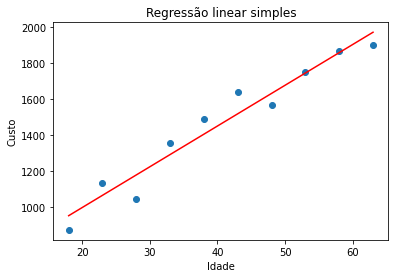

In [66]:
plt.plot(X, Y, 'o') # 'o' - usar bolinhas
plt.plot(X, previsoes, color='red')
# adicionar algumas personalizações
plt.title('Regressão linear simples')
plt.xlabel('Idade')
plt.ylabel('Custo')